Pre-Requisite:
- pip install pandas seaborn matplotlib
- pip install scikit-learn

References on source and article followed:
1. Starting Guide for Data preceossing - 1. Load the Data, 3. Saving the Cleaned Data into a new CSV file: https://medium.com/sciforce/data-cleaning-and-preprocessing-for-beginners-25748ee00743
2. Data Preprocessing Complete Guide: https://www.kaggle.com/code/berkayalan/data-preprocessing-a-complete-guide/notebook
3. Pandas DataFrame shape Property: https://www.w3schools.com/python/pandas/ref_df_shape.asp
4. Further Guide for Data preprocessing for step 2: https://neptune.ai/blog/data-preprocessing-guide
5. Handling missing values and Outliers: 
https://www.kdnuggets.com/2020/07/easy-guide-data-preprocessing-python.html
https://towardsdatascience.com/outlier-detection-part1-821d714524c#:~:text=For%20example%2C%20a%20z%2Dscore,similar%20to%20standard%20deviation%20method.
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py
https://scikit-learn.org/stable/modules/preprocessing.html

1. Load the Data

In [204]:
import numpy as np
import pandas as pd

# Load the data
df = pd.read_csv('badmintondata.csv')
print("\nOriginal Data:")
print(f"Initial shape: {df.shape}")
df


Original Data:
Initial shape: (72800, 8)


,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres
0,4,1,10,40,0,4.075543,1.0,1.662912
1,4,1,10,40,0,4.152007,1.0,1.724866
2,4,1,10,40,0,4.228906,1.0,1.788139
3,4,1,10,40,0,4.302100,1.0,1.845245
4,4,1,10,40,0,4.376877,1.0,1.904128
...,...,...,...,...,...,...,...,...
72795,0,0,0,0,0,0.000000,0.0,0.000000
72796,0,0,0,0,0,0.000000,0.0,0.000000
72797,0,0,0,0,0,0.000000,0.0,0.000000
72798,0,0,0,0,0,0.000000,0.0,0.000000


2. Data Cleaning

2a. Remove only those rows that contain zero in every column

2b. Generate SHOT_ID

In [205]:
import numpy as np
import pandas as pd

# Generate SHOT_ID
block_id = 1  # block_id
SHOT_ID = []  # List to store the generated SHOT_IDs
zero_row_flag = False

# Iterate over each row in the DataFrame
for _, row in df.iterrows():
    # Check if the row contains all zeros
    if (row.values == 0).all():
        zero_row_flag = True  # Set the flag indicating zero row
        continue
    else:
        # If the flag is set, increment block_id and reset zero_row_flag
        if zero_row_flag:
            block_id += 1
            zero_row_flag = False
        # Add the block_id to SHOT_ID
        SHOT_ID.append(block_id)

# Store original number of rows
original_rows = df.shape[0]

# Remove rows with all zeros
df = df.loc[~(df.values == 0).all(axis=1)]

df = df.assign(SHOT_ID=np.nan)
df['SHOT_ID'] = SHOT_ID

# Reorder columns
df = df[['SHOT_ID', 'HUMAN PLAYER POSITION (X) metres', 'HUMAN PLAYER POSITION (Y) metres',
         'INITITAL VELOCITY OF SHUTTELCOCK(m/s)', 'INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)',
         'SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)', 'SHUTTLECOCK POSITIION IN AIR(X ) metres',
         'SHUTTLECOCK POSITIION IN AIR(Y) metres', 'SHUTTLECOCK POSITIION IN AIR(Z) metres']]

# Calculate and print the number of rows removed
removed_rows_zeros = original_rows - df.shape[0]
print(f"\nData after removing rows with all zero values: (removed {removed_rows_zeros} rows)")
print(f"Current shape: {df.shape}")
df



Data after removing rows with all zero values: (removed 33642 rows)
Current shape: (39158, 9)


,SHOT_ID,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres
0,1,4,1,10,40,0,4.075543,1.000000,1.662912
1,1,4,1,10,40,0,4.152007,1.000000,1.724866
2,1,4,1,10,40,0,4.228906,1.000000,1.788139
3,1,4,1,10,40,0,4.302100,1.000000,1.845245
4,1,4,1,10,40,0,4.376877,1.000000,1.904128
...,...,...,...,...,...,...,...,...,...
72634,364,4,4,70,70,15,9.217823,5.398111,2.591053
72635,364,4,4,70,70,15,9.275177,5.413480,2.041410
72636,364,4,4,70,70,15,9.326363,5.427195,1.463594
72637,364,4,4,70,70,15,9.370879,5.439123,0.862842


2c. Remove duplicates(if any): 

In [206]:
# Remove duplicates(if any): 
df_no_duplicates = df.drop_duplicates()
removed_rows_duplicates = df.shape[0] - df_no_duplicates.shape[0]
df = df_no_duplicates
print(f"\nData after removing duplicates: (removed {removed_rows_duplicates} rows)")
print(f"Current shape: {df.shape}")
df


Data after removing duplicates: (removed 0 rows)
Current shape: (39158, 9)


,SHOT_ID,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres
0,1,4,1,10,40,0,4.075543,1.000000,1.662912
1,1,4,1,10,40,0,4.152007,1.000000,1.724866
2,1,4,1,10,40,0,4.228906,1.000000,1.788139
3,1,4,1,10,40,0,4.302100,1.000000,1.845245
4,1,4,1,10,40,0,4.376877,1.000000,1.904128
...,...,...,...,...,...,...,...,...,...
72634,364,4,4,70,70,15,9.217823,5.398111,2.591053
72635,364,4,4,70,70,15,9.275177,5.413480,2.041410
72636,364,4,4,70,70,15,9.326363,5.427195,1.463594
72637,364,4,4,70,70,15,9.370879,5.439123,0.862842


2d. Handling missing values:

In [207]:
# Checking for missing values
missing_values = df.isna().sum()
print(f"\nMissing values in the data: \n{missing_values}")


Missing values in the data: 
SHOT_ID                                        0
HUMAN PLAYER POSITION (X) metres               0
HUMAN PLAYER POSITION (Y) metres               0
INITITAL VELOCITY OF SHUTTELCOCK(m/s)          0
INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)      0
SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)    0
SHUTTLECOCK POSITIION IN AIR(X ) metres        0
SHUTTLECOCK POSITIION IN AIR(Y) metres         0
SHUTTLECOCK POSITIION IN AIR(Z) metres         0
dtype: int64


Results above shown no missing values in the dataset provided.

2e. Outliers detection and handling using Inter-Quartile Range (IQR):


Initial shape: (39158, 9)


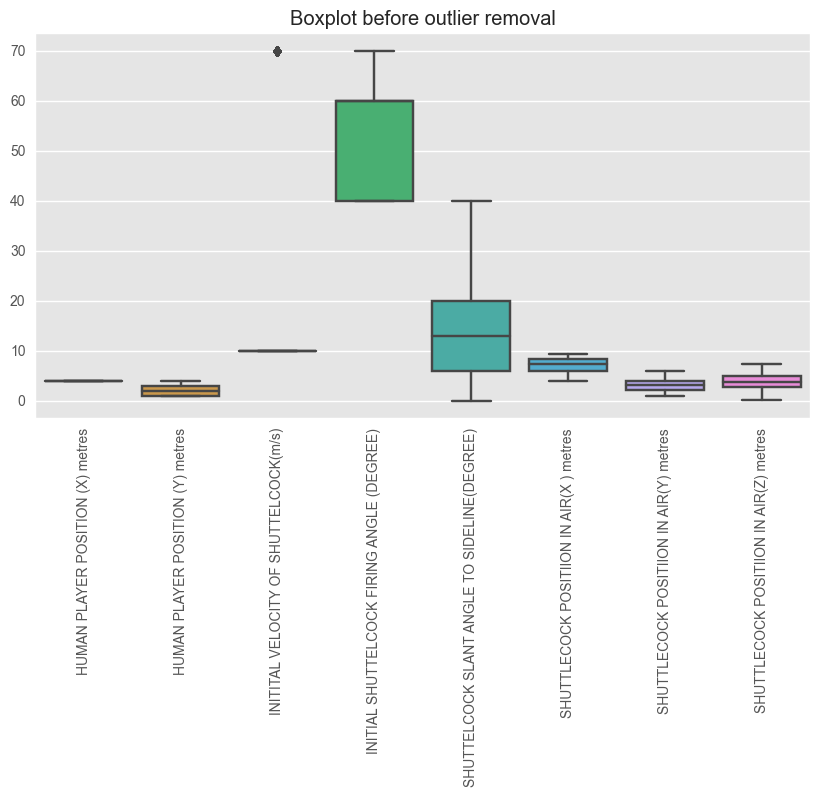


Interquartile Range, Q1, Q3, and outlier thresholds:
HUMAN PLAYER POSITION (X) metres:
Q1: 4.0
Q3: 4.0
IQR: 0.0
Lower outlier threshold: 4.0
Upper outlier threshold: 4.0

HUMAN PLAYER POSITION (Y) metres:
Q1: 1.0
Q3: 3.0
IQR: 2.0
Lower outlier threshold: -2.0
Upper outlier threshold: 6.0

INITITAL VELOCITY OF SHUTTELCOCK(m/s):
Q1: 10.0
Q3: 10.0
IQR: 0.0
Lower outlier threshold: 10.0
Upper outlier threshold: 10.0

INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE):
Q1: 40.0
Q3: 60.0
IQR: 20.0
Lower outlier threshold: 10.0
Upper outlier threshold: 90.0

SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE):
Q1: 6.0
Q3: 20.0
IQR: 14.0
Lower outlier threshold: -15.0
Upper outlier threshold: 41.0

SHUTTLECOCK POSITIION IN AIR(X ) metres:
Q1: 5.875451967749999
Q3: 8.43810822975
IQR: 2.562656262000001
Lower outlier threshold: 2.031467574749998
Upper outlier threshold: 12.282092622750001

SHUTTLECOCK POSITIION IN AIR(Y) metres:
Q1: 2.25134737125
Q3: 4.051472049999999
IQR: 1.8001246787499992
Lower outlier thresh

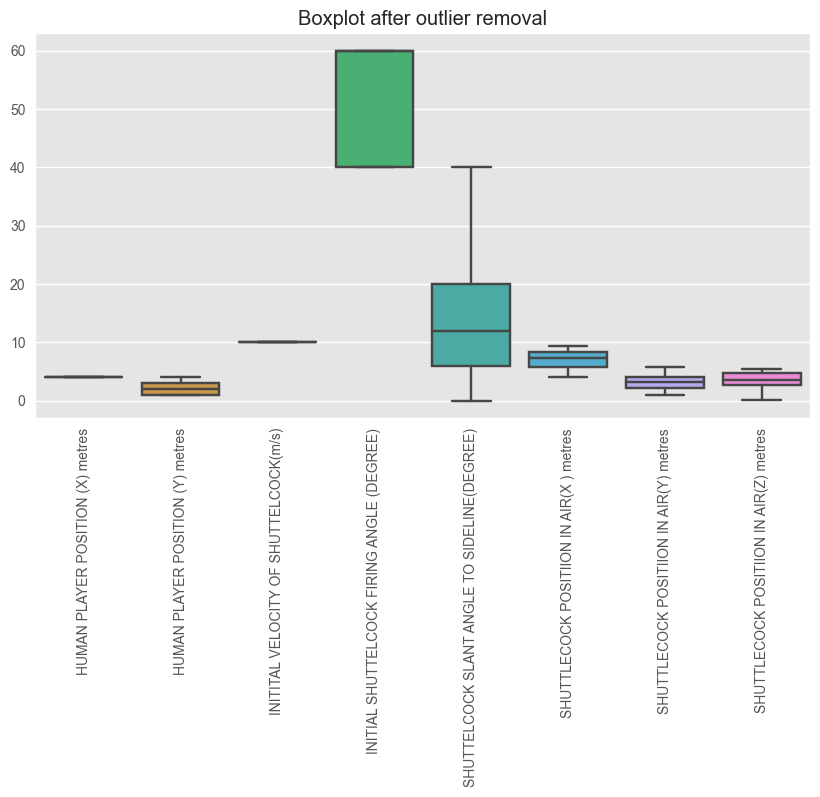

,SHOT_ID,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres
0,1,4,1,10,40,0,4.075543,1.000000,1.662912
1,1,4,1,10,40,0,4.152007,1.000000,1.724866
2,1,4,1,10,40,0,4.228906,1.000000,1.788139
3,1,4,1,10,40,0,4.302100,1.000000,1.845245
4,1,4,1,10,40,0,4.376877,1.000000,1.904128
...,...,...,...,...,...,...,...,...,...
49944,250,4,4,10,60,10,8.885213,4.861395,0.941893
49945,250,4,4,10,60,10,8.898323,4.863706,0.739085
49946,250,4,4,10,60,10,8.919513,4.867443,0.529859
49947,250,4,4,10,60,10,8.935025,4.870178,0.316693


In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print initial data shape
print(f"\nInitial shape: {df.shape}")

# Plotting before outlier removal
plt.figure(figsize=(10,5))
plt.title('Boxplot before outlier removal')
sns.boxplot(data=df.iloc[:, 1:])  # Exclude the first column (SHOT_ID)
plt.xticks(rotation=90)
plt.show()

# Calculate Q1, Q3, and IQR
Q1 = df.iloc[:, 1:].quantile(0.25)  # Exclude the first column (SHOT_ID)
Q3 = df.iloc[:, 1:].quantile(0.75)  # Exclude the first column (SHOT_ID)
IQR = Q3 - Q1

print("\nInterquartile Range, Q1, Q3, and outlier thresholds:")  
for col in df.columns[1:]:  # Exclude the first column (SHOT_ID)
    print(f"{col}:")
    print(f"Q1: {Q1[col]}") 
    print(f"Q3: {Q3[col]}") 
    print(f"IQR: {IQR[col]}")
    print(f"Lower outlier threshold: {Q1[col] - 1.5 * IQR[col]}")
    print(f"Upper outlier threshold: {Q3[col] + 1.5 * IQR[col]}\n")

# Identify outlier rows before removing them
outlier_mask = ((df.iloc[:, 1:] < (Q1 - 1.5 * IQR)) | (df.iloc[:, 1:] > (Q3 + 1.5 * IQR))).any(axis=1)

# Create a dataframe of outliers
df_outliers = df[outlier_mask].copy()

# Save outliers to CSV
df_outliers.to_csv("outliers.csv", index=False)

# Filter out outliers
df_no_outliers = df[~outlier_mask]

# Calculate and print number of rows removed
removed_rows_outliers = df.shape[0] - df_no_outliers.shape[0]
print(f"\nData after removing outliers: (removed {removed_rows_outliers} rows)")

# Print updated data shape
print(f"Current shape: {df_no_outliers.shape}")

# Plotting after outlier removal
plt.figure(figsize=(10,5))
plt.title('Boxplot after outlier removal')
sns.boxplot(data=df_no_outliers.iloc[:, 1:])  # Exclude the first column (SHOT_ID)
plt.xticks(rotation=90)
plt.show()

# Update df to df_no_outliers
df = df_no_outliers
df


2f. Out-of-Court shots -> Add additional column to record namely: "OUT_OF_COURT_SHOTS" whereby "IN"= 1, "OUT" = 0.

In [209]:
# Define court dimensions
court_length = 13.4  # in metres
court_width = 5.18  # in metres

# Initialize 'OUT_OF_COURT_SHOTS' column
df = df.assign(OUT_OF_COURT_SHOTS = np.nan)

# Assign values to 'OUT_OF_COURT_SHOTS' column
df['OUT_OF_COURT_SHOTS'] = np.where((df['SHUTTLECOCK POSITIION IN AIR(X ) metres'] > court_length) | 
                                     (df['SHUTTLECOCK POSITIION IN AIR(Y) metres'] > court_width), 0, 1)

# Count the number of 'IN' and 'OUT' rows
in_court = df['OUT_OF_COURT_SHOTS'].sum()
out_of_court = df.shape[0] - in_court

print(f"\nData after adding 'OUT_OF_COURT_SHOTS':")
print(f"Number of 'IN' rows: {in_court}")
print(f"Number of 'OUT' rows: {out_of_court}")
print(f"Current shape: {df.shape}")
df


Data after adding 'OUT_OF_COURT_SHOTS':
Number of 'IN' rows: 34166
Number of 'OUT' rows: 546
Current shape: (34712, 10)


,SHOT_ID,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres,OUT_OF_COURT_SHOTS
0,1,4,1,10,40,0,4.075543,1.000000,1.662912,1
1,1,4,1,10,40,0,4.152007,1.000000,1.724866,1
2,1,4,1,10,40,0,4.228906,1.000000,1.788139,1
3,1,4,1,10,40,0,4.302100,1.000000,1.845245,1
4,1,4,1,10,40,0,4.376877,1.000000,1.904128,1
...,...,...,...,...,...,...,...,...,...,...
49944,250,4,4,10,60,10,8.885213,4.861395,0.941893,1
49945,250,4,4,10,60,10,8.898323,4.863706,0.739085,1
49946,250,4,4,10,60,10,8.919513,4.867443,0.529859,1
49947,250,4,4,10,60,10,8.935025,4.870178,0.316693,1


2g. Additional check (TO BE REMOVED)

In [210]:
import pandas as pd

# Load the cleaned_badmintondata.csv file into a pandas DataFrame
df = pd.read_csv('cleaned_badmintondata.csv')

# Extract the 'SHOT_ID' column from the DataFrame
shot_id = df['SHOT_ID']

# Create a set of all numbers from 1 to 250
all_ids = set(range(1, 251))

# Check if there's any missing ID in the column
missing_ids = all_ids - set(shot_id)
if len(missing_ids) == 0:
    print("SHOT_ID column increments by 1 up to 250 correctly, without any missing ID.")
else:
    print(f"SHOT_ID column has missing IDs. The missing IDs are: {sorted(list(missing_ids))}")

SHOT_ID column increments by 1 up to 250 correctly, without any missing ID.


3. Saving the Cleaned Data into a new CSV file: 

In [212]:
# Saving the cleaned data to a new csv file
df.to_csv("cleaned_badmintondata.csv", index=False)
print("Cleaned data saved to 'cleaned_badmintondata.csv'")

Cleaned data saved to 'cleaned_badmintondata.csv'


4. Dimension reduction using Principle Component Analysis(PCA):

In [213]:
import numpy as np
import pandas as pd

# Load the data
df = pd.read_csv('cleaned_badmintondata.csv')
print("\nCleaned Data:")
print(f"Initial shape: {df.shape}")
df


Cleaned Data:
Initial shape: (34712, 10)


,SHOT_ID,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres,OUT_OF_COURT_SHOTS
0,1,4,1,10,40,0,4.075543,1.000000,1.662912,1
1,1,4,1,10,40,0,4.152007,1.000000,1.724866,1
2,1,4,1,10,40,0,4.228906,1.000000,1.788139,1
3,1,4,1,10,40,0,4.302100,1.000000,1.845245,1
4,1,4,1,10,40,0,4.376877,1.000000,1.904128,1
...,...,...,...,...,...,...,...,...,...,...
34707,250,4,4,10,60,10,8.885213,4.861395,0.941893,1
34708,250,4,4,10,60,10,8.898323,4.863706,0.739085,1
34709,250,4,4,10,60,10,8.919513,4.867443,0.529859,1
34710,250,4,4,10,60,10,8.935025,4.870178,0.316693,1


4a. Splitting the Data into Training and Test Sets

In [252]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load data
data = pd.read_csv('cleaned_badmintondata.csv')

# Separate predictors (X) and target (y)
X = data.drop(['HUMAN PLAYER POSITION (X) metres',
               'HUMAN PLAYER POSITION (Y) metres',
               'INITITAL VELOCITY OF SHUTTELCOCK(m/s)',
               'INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)',
               'SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)'], axis=1) 

y = data[['SHUTTLECOCK POSITIION IN AIR(X ) metres', 
          'SHUTTLECOCK POSITIION IN AIR(Y) metres', 
          'SHUTTLECOCK POSITIION IN AIR(Z) metres']]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")

Training set shape: (27769, 10)
Test set shape: (6943, 10)


In [263]:
num_columns = X.shape[1]
print(f"Number of columns in predictors (X): {num_columns}")


Number of columns in predictors (X): 5


4d. Visualize the data in 2D and 3D scatter plots to observe any patterns or clusters

4b. Standardizing the Training Set Data

In [253]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


4c. Apply PCA to the standardized training set

In [254]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Create a PCA object
pca = PCA()

# Fit PCA to the training set
pca.fit(X_train_scaled)

print("Variance explained by all the principal components =", sum(pca.explained_variance_ratio_ * 100))

Variance explained by all the principal components = 100.0


In [255]:
pca.explained_variance_ratio_ * 100

array([36.78463663, 24.35437174, 18.89907202, 15.11038484,  4.85153477])

In [256]:
np.cumsum(pca.explained_variance_ratio_ * 100)

array([ 36.78463663,  61.13900837,  80.03808039,  95.14846523,
       100.        ])

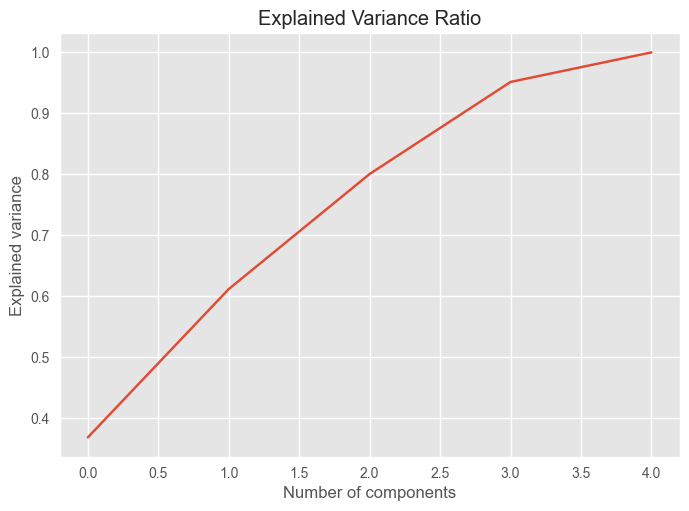

In [257]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained Variance Ratio')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('explained_variance_ratio_plot.png', dpi=100)


In [258]:
# Apply PCA by setting n_components=2 and plot 2D Scatterplot
pca_2d = PCA(n_components=2)
X_pca_2D = pca_2d.fit_transform(X_train_scaled)
explained_variance_2D = sum(pca_2d.explained_variance_ratio_) * 100
print(f"The 2D scatterplot explains about {explained_variance_2D:.2f}% of the variability in the data.")


The 2D scatterplot explains about 61.14% of the variability in the data.


In [259]:
# Apply PCA by setting n_components=3 and plot 3D Scatterplot
pca_3d = PCA(n_components=3)
X_pca_3D = pca_3d.fit_transform(X_train_scaled)
explained_variance_3D = sum(pca_3d.explained_variance_ratio_) * 100
print(f"The 3D scatterplot explains about {explained_variance_3D:.2f}% of the variability in the data.")


The 3D scatterplot explains about 80.04% of the variability in the data.


In [260]:
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_train_scaled)

print(f"The shape of the X_pca_95 array is: {X_pca_95.shape}")
print(f"This means that the algorithm has found {X_pca_95.shape[1]} principal components to preserve 95% of the variability in the data.")


The shape of the X_pca_95 array is: (27769, 4)
This means that the algorithm has found 4 principal components to preserve 95% of the variability in the data.


In [261]:
# Create a DataFrame from the PCA result
df_pca_95 = pd.DataFrame(data = X_pca_95, columns = [f"PC{i+1}" for i in range(X_pca_95.shape[1])])
df_pca_95 = pd.concat([df_pca_95, y_train.reset_index(drop=True)], axis=1)

print(f"The size of the df_pca_95 including the label column is: {df_pca_95.shape}")


The size of the df_pca_95 including the label column is: (27769, 7)


In [262]:
# Save the PCA result to a CSV file
df_pca_95.to_csv("pca_95_badmintondata.csv", index=False)
print("PCA result saved to 'pca_95_badmintondata.csv'")

PCA result saved to 'pca_95_badmintondata.csv'


4d. Visualize the data in 2D and 3D scatter plots to observe any patterns or clusters